In [1]:
import pandas as pd
from config import *
from help_functions import *
import seaborn as sns
import matplotlib.pyplot as plt

/Users/noa/opt/anaconda3/lib/python3.8/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
/Users/noa/opt/anaconda3/lib/python3.8/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [2]:
def get_all_results_df(data, n_trees_grid, n_iter, tree_type = None, run_name = None):
    if tree_type:
        data = data[data["tree_type"]==tree_type]
    if run_name:
        data = data[data["run_name"] == run_name]
    all_results_df = pd.DataFrame()
    for i in range(n_iter):
        print(i)
        for n_trees in n_trees_grid:
            grouped_data = data.groupby(by=["msa_name", "tree_type","run_name"]).sample(n=n_trees,random_state = i
                                                                                               ).groupby(
                by=["msa_name","tree_type","run_name"]).agg({"delta_ll_from_curr_starting_tree_best_topology": 'min'}).reset_index()
        grouped_data["msa_ind"] = grouped_data.index
        grouped_data["iteration"] = i
        if all_results_df.empty:
            all_results_df = grouped_data.copy()
        else:
            all_results_df = pd.concat([all_results_df, grouped_data])
    all_results_df = all_results_df.reset_index()
    return all_results_df

def pivot_results_df(all_results_df):
    all_results_df_melted = (all_results_df.melt(id_vars=["msa_ind","iteration","index","run_name","tree_type"],var_name = "n_trees", value_name = "best_ll_diff"))
    print(all_results_df_melted)
    all_results_df_melted = all_results_df_melted.groupby(["msa_ind","n_trees","index","run_name","tree_type"]).agg({'best_ll_diff': 'mean'}).reset_index()
    all_results_df_melted["msa_name"] =  all_results_df_melted["msa_ind"].astype('category')
    return all_results_df_melted

In [3]:
    overall_data_path = "/Users/noa/Workspace/raxml_deep_learning_results/single_gene_MSAs/full_raxml_data.tsv"
    data = pd.read_csv(overall_data_path, sep=CSV_SEP)
    tree_type = None
    n_iter=2
    n_trees_grid = list(range(1,5))
    run_name=None
    if tree_type:
        name = f'only_{tree_type}_{run_name}'
    else:
        name = f"both_parsimony_and_random_{run_name}"

    data["is_best_tree"] = data["rf_from_overall_msa_best_topology"] == 0
    all_results_df = get_all_results_df(data, n_trees_grid, n_iter = n_iter, tree_type = tree_type, run_name=run_name)
  

0
1


In [4]:
all_results_df.head(20)

,index,msa_name,tree_type,run_name,delta_ll_from_curr_starting_tree_best_topology,msa_ind,iteration
0,0,_BoroA6_OG107_gene75.fasta,parsimony,default,0.000000,0,0
1,1,_BoroA6_OG107_gene75.fasta,parsimony,params_0,9.928887,1,0
2,2,_BoroA6_OG107_gene75.fasta,parsimony,params_1,0.022527,2,0
3,3,_BoroA6_OG107_gene75.fasta,parsimony,params_10,0.000000,3,0
4,4,_BoroA6_OG107_gene75.fasta,parsimony,params_11,0.000000,4,0
5,5,_BoroA6_OG107_gene75.fasta,parsimony,params_12,0.000000,5,0
6,6,_BoroA6_OG107_gene75.fasta,parsimony,params_13,0.000000,6,0
7,7,_BoroA6_OG107_gene75.fasta,parsimony,params_14,0.000000,7,0
8,8,_BoroA6_OG107_gene75.fasta,parsimony,params_15,0.000000,8,0
9,9,_BoroA6_OG107_gene75.fasta,parsimony,params_16,0.000000,9,0


In [13]:
    all_results_df_melted = (all_results_df.melt(id_vars=["msa_name","msa_ind","iteration","run_name","tree_type","index","delta_ll_from_curr_starting_tree_best_topology"],var_name = "n_trees", value_name = "best_ll_diff"))
    all_results_df_melted = all_results_df_melted.groupby(["msa_name","msa_ind","n_trees","run_name","tree_type"]).agg({'best_ll_diff': 'mean'}).reset_index()
    all_results_df_melted["msa_ind_name"] =  all_results_df_melted["msa_ind"].astype('category')


In [17]:
    all_results_df_melted.head(10)

,msa_name,msa_ind,n_trees,run_name,tree_type,best_ll_diff,msa_ind_name


KeyboardInterrupt: 

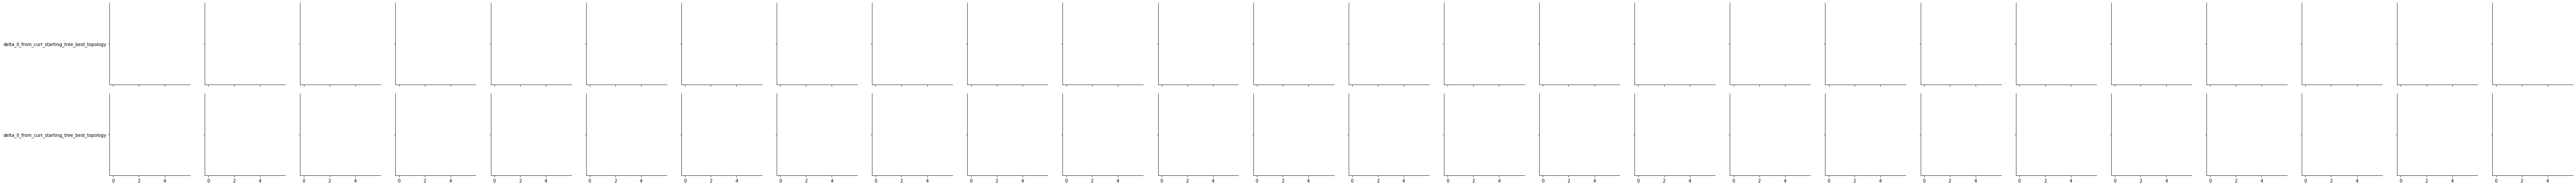

In [7]:
    g = sns.FacetGrid(all_results_df_melted, col="run_name", row ="tree_type", hue="msa_ind_name")
    name= "test"
    g.map(sns.lineplot, "best_ll_diff", "n_trees",legend = False)
    plt.savefig(f'line_plot_test.png')
    plt.show()

In [15]:
    sns.boxplot(data=all_results_df_melted  , y="best_ll_diff", x="n_trees")
    plt.savefig(f'{name}_bar_plot.png')
    plt.tight_layout()
    plt.show()

ValueError: min() arg is an empty sequence

'delta_ll_from_curr_starting_tree_best_topology'